# CUSTOMER CHURN PREDICTION
[DATASET KAGGLE](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
path = r"C:\Users\lenovo\Downloads\CODSOFT_ML\task_3\DATASET\Churn_Modelling.csv"
df_raw = pd.read_csv(path)

In [3]:
display(df_raw.head(0))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [4]:
display(df_raw.head(1))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [5]:
# If the data is malformatted as a single column, split it into multiple columns
if len(df_raw.columns) == 1:
    split_col = df_raw.columns[0]
    df = df_raw[split_col].str.split(',', expand=True)
    
    headers = ['RowNumber','CustomerId','Surname','CreditScore','Geography',
               'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
               'IsActiveMember','EstimatedSalary','Exited']
    
    df.columns = headers
else:
    df = df_raw

# Convert all values to float for further analysis
#df = df.apply(pd.to_numeric, errors='coerce')  # This will convert strings to NaN if they can't be changed to numbers

display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
display(df.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
print(', '.join(df['Geography'].unique()))

France, Spain, Germany


In [8]:
print(', '.join(map(str, df_raw['Exited'].unique())))

1, 0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming you've already read the data into the dataframe 'df'

# Using LabelEncoder for 'Species' column
label_enc = LabelEncoder()
df['Exited'] = label_enc.fit_transform(df['Exited'])

# Converting other columns (if they are not in a numeric format)
for column in ['RowNumber','CustomerId','Surname','CreditScore','Geography',
               'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
               'IsActiveMember','EstimatedSalary']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

display(df.head())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,NaN,619,NaN,NaN,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,NaN,608,NaN,NaN,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,NaN,502,NaN,NaN,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,NaN,699,NaN,NaN,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,NaN,850,NaN,NaN,43,2,125510.82,1,1,1,79084.10,0


In [10]:
display(df.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,NaN,771,NaN,NaN,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,NaN,516,NaN,NaN,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,NaN,709,NaN,NaN,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,NaN,772,NaN,NaN,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,NaN,792,NaN,NaN,28,4,130142.79,1,1,0,38190.78,0


In [11]:
print("Shape of Dataset:", df.shape)
print(df.isnull().sum())


Shape of Dataset: (10000, 14)
RowNumber              0
CustomerId             0
Surname            10000
CreditScore            0
Geography          10000
Gender             10000
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
dtype: int64


In [12]:
# Drop columns with all missing values
df= df_raw.dropna(axis=1, how='all')

# Check the shape and info of the cleaned dataset
print(df.shape)
print(df.info())


(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


In [13]:
display(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
display(df.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


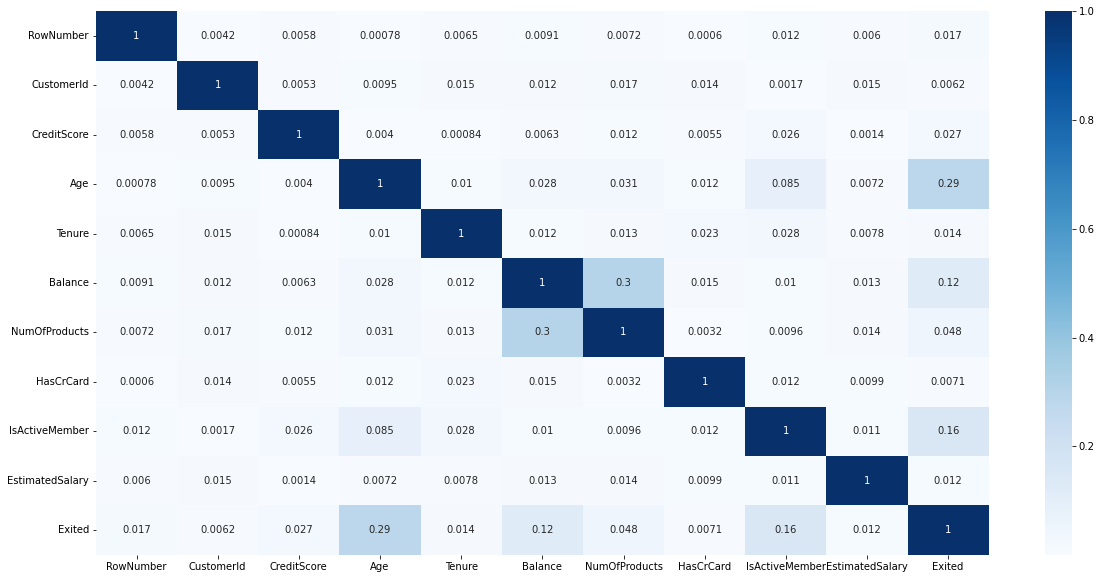

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, cmap='Blues')
plt.show()


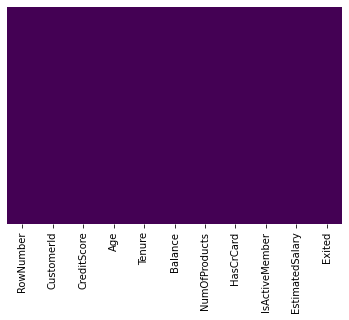

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

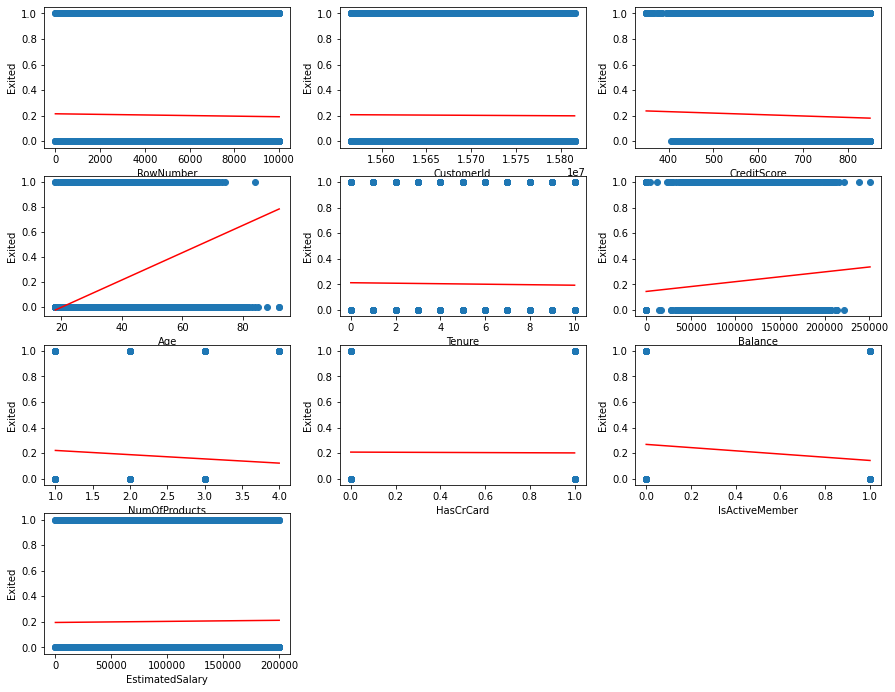

In [17]:
plt.figure(figsize=(15, 15))

for i, idx in enumerate(df.columns[0:10]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['Exited']
    plt.plot(x, y, 'o')
    

    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Exited')    

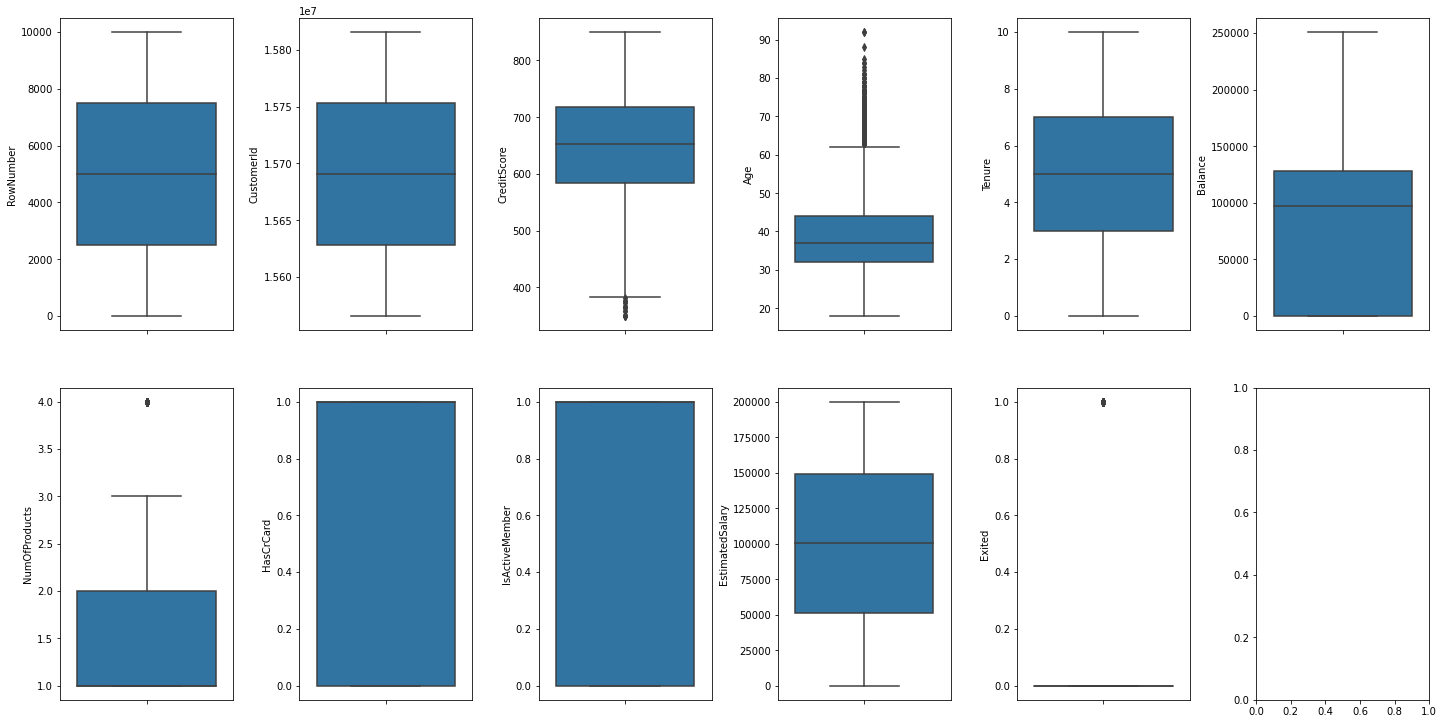

In [18]:

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


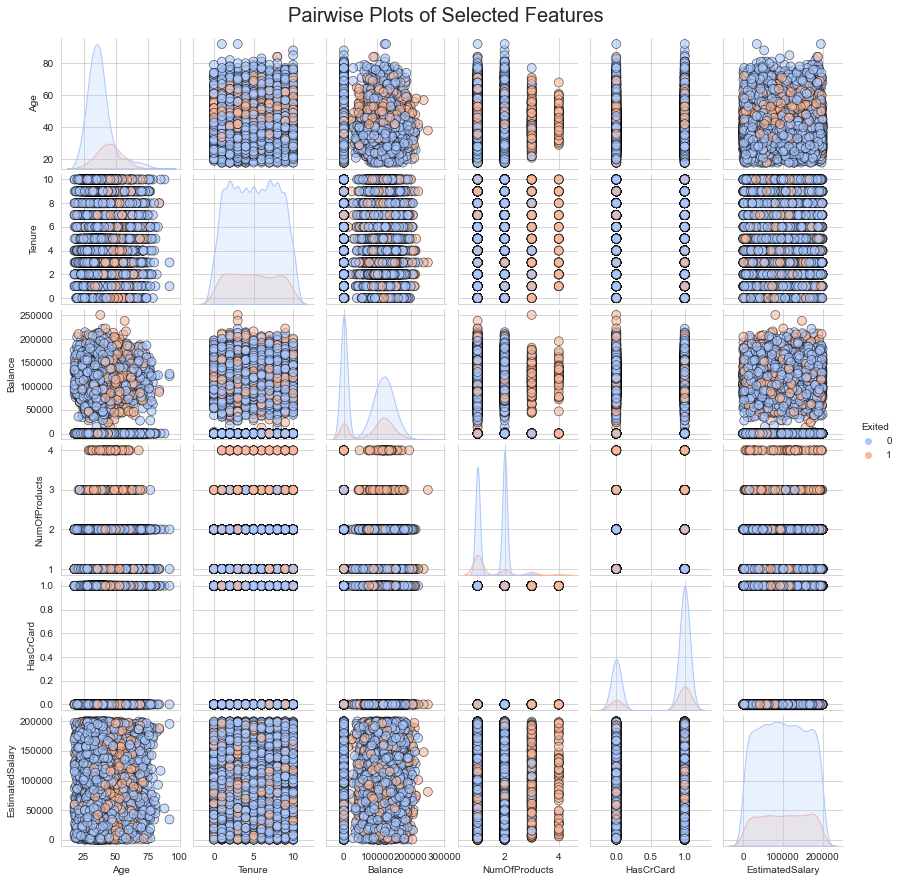

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetics for the plot
sns.set_style("whitegrid")

# Create an enhanced pairplot with hue for 'Exited'
sns.pairplot(df[['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'Exited','EstimatedSalary']], 
             diag_kind='kde', 
             hue='Exited',
             palette="coolwarm",  # Choose a color palette that distinguishes between 0 and 1
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, 
             height=2)

# Set the title for the plot
plt.suptitle('Pairwise Plots of Selected Features', size=20, y=1.02)
plt.show()


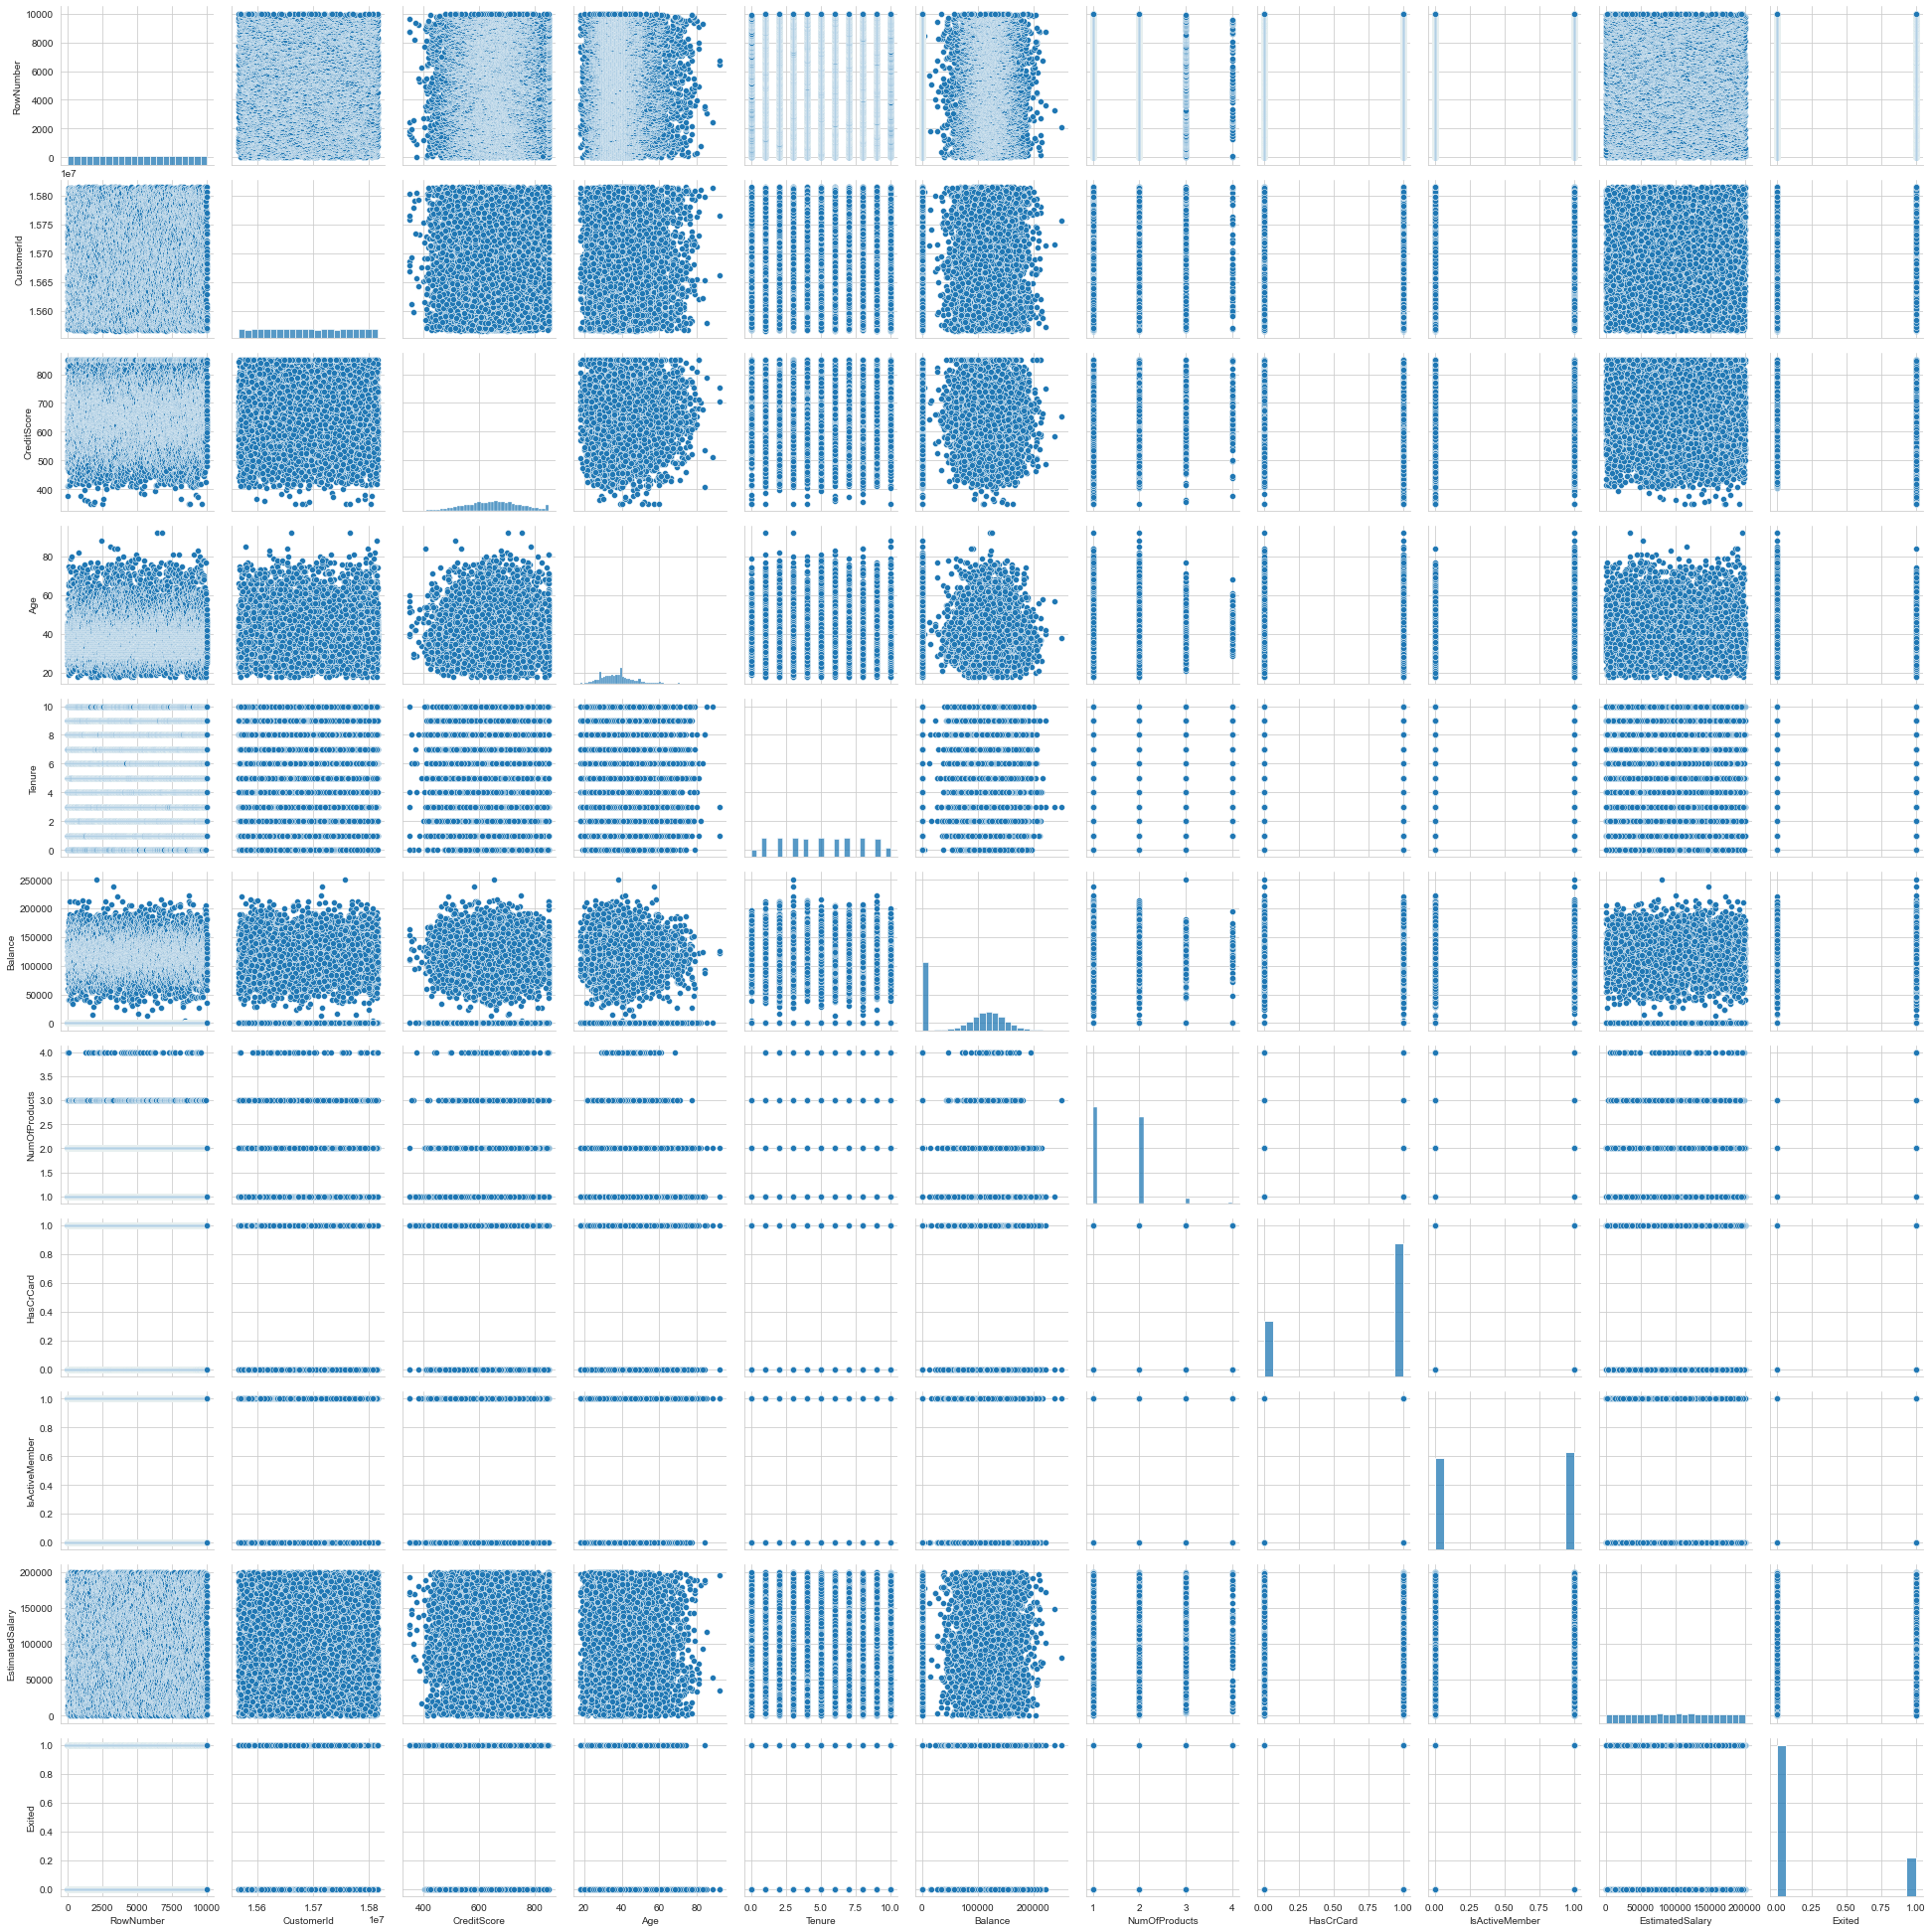

In [20]:
#visualization
sns.pairplot(df)
plt.show()

In [21]:
x = df.iloc[:, 0:10]
y = df.iloc[:, -1]
display(x)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [22]:
display(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print('Training Shape: ', x_train.shape)
print('Testing Shape: ', x_test.shape)

Training Shape:  (9000, 10)
Testing Shape:  (1000, 10)


In [24]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [25]:
import numpy as np

y_predict = regression_model.predict(x_test)
y_predict_rounded = np.round(y_predict)

sum = 0
for i, n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1

correct_predictions = np.sum(y_test == y_predict_rounded)
accuracy = correct_predictions / len(y_test)
print(accuracy)


0.81


In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ', model.score(x_train, y_train)*100)
print('Testing Accuracy: ', model.score(x_test, y_test)*100)
print('Model Accuracy: ', r2_score(y, model.predict(x))*100)


Training Accuracy:  12.80487189077989
Testing Accuracy:  11.559252406052313
Model Accuracy:  12.695846821799094


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)


In [28]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

#Prediction
prediction=regressor.predict(x_test)
prediction1=pd.DataFrame(prediction)
display(prediction1)

,0
0,0.217622
1,0.138605
2,0.292140
3,0.402470
4,0.039296
...,...
995,0.462469
996,0.162595
997,0.159223
998,0.374876


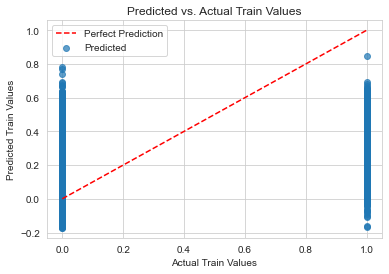

In [29]:
# Plotting the linear regression line for training data
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()

plt.show()


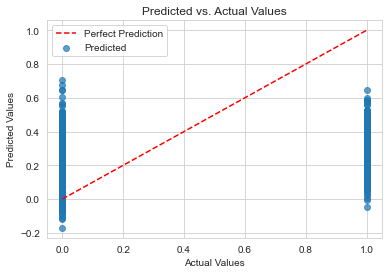

In [30]:
y_test_pred = model.predict(x_test)

# Plotting the linear regression line
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()

plt.show()


use another algorithm to increase accuracy

Training Accuracy: 85.83%
Testing Accuracy: 85.90%


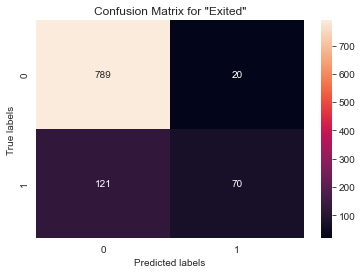

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(max_depth=5)  # limiting depth to avoid overfitting

# Fit the model
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "Exited"')
plt.show()



Training Accuracy:  90.29717822212517
Testing Accuracy:  22.037354629527762
Model Accuracy:  83.79576602167943


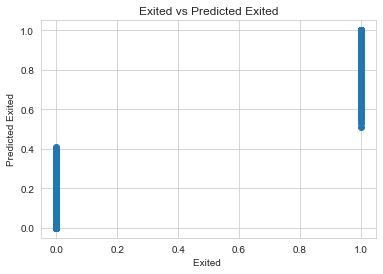

In [32]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Exited ")
plt.ylabel("Predicted Exited")
plt.title("Exited vs Predicted Exited")
plt.show()

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Training Accuracy:  74.97867962668427
Testing Accuracy:  19.146772095682497
Model Accuracy:  69.66285287422482


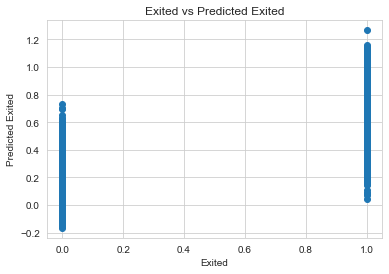

In [34]:

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Exited")
plt.ylabel("Predicted Exited")
plt.title("Exited vs Predicted Exited")
plt.show()

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [36]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]

In [37]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]

In [40]:
accuracy = model.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.815


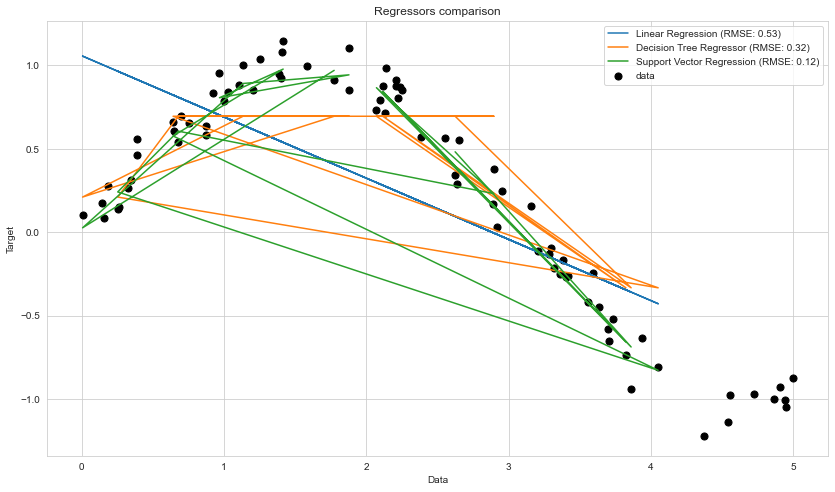

In [41]:
# Generating sample data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
}

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()


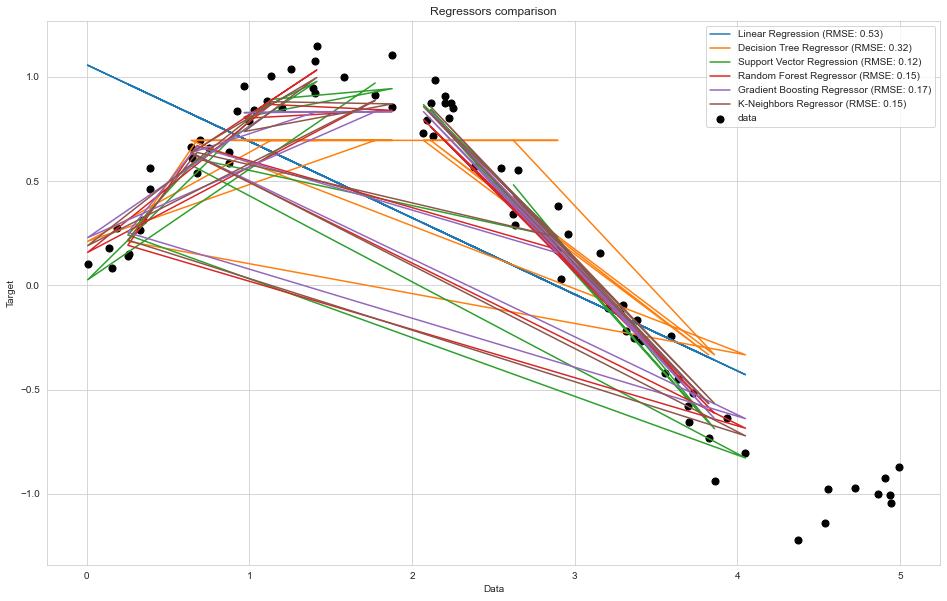

In [42]:
  # Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Plotting
plt.figure(figsize=(16, 10))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()
